# Práctica 4:Perceptrón

##### Uno de los primeros algoritmos de aprendizaje automático fue el perceptrón, que permite aprender el conjunto de pesos de una función discriminante para dividir dos clases linealmente separables. La primera parte de esta práctica está dedicada a mostrar un ejemplo del Perceptrón.

Realizo los importes necesarios.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, SGDClassifier
import numpy as np
import matplotlib.pyplot as plt

Aquí genero las muestras de dos dimensiones siendo dos clases de 15 muestras cada una. Uno de los grupos lo centro en el 0,0 y el otro en el 10, 10 para que sean linealmente separables. Para ello, utilizo la función make_blobs.

In [15]:
centers = np.array([[0,0],[10,10]])
X, y = make_blobs(n_samples=30, n_features=2,random_state=0, centers=centers)

Divido en entrenamiento y test con un 70% para entrenamiento, como en la anterior práctica.

In [16]:
trainx, testx, trainy, testy = train_test_split(X, y, train_size=0.7,random_state=0)

Entreno las muestras en el perceptron.

In [17]:
p = Perceptron()
p.fit(trainx,trainy)

Perceptron()

A continuación divido ambos grupos de datos dibujando una recta con los pesos obtenidos de la fórmula. Los ejes son las dos dimensiones de los datos.

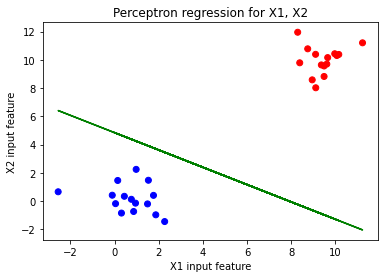

In [18]:
x1 = X[:, 0]
x2 = X[:, 1]
color = ['red' if value == 1 else 'blue' for value in y]
plt.scatter(x1, x2, marker='o', color=color)
plt.xlabel('X1 input feature')
plt.ylabel('X2 input feature')
plt.title('Perceptron regression for X1, X2')

slope = -(p.coef_[0][0]/p.coef_[0][1])
intercept = -p.intercept_/p.coef_[0][1]
Y = (slope*x1) + intercept
plt.plot(x1, Y, color = "green")
plt.show()


Como podemos observar, gracias a centrar los datos en diferentes puntos, son linealmente separables. Por otro lado la recta dibujada por el Perceptron divide perfectamente ambos grupos, por lo tanto, es un buen ajuste.

A continuación utilizo la función "decision_function" para comprobar con los pesos actuales, cuantos valores del grupo test separa correctamente.

In [19]:

sum(np.equal(np.greater(SGDClassifier.decision_function(p, testx), np.zeros(shape=testx.shape[0])), testy )) / testx.shape[0]


1.0

Utilizando diferentes funciones de numpy hallamos en un porcentaje el acierto, que es de un 100%. Por lo tanto, es un ajuste perfecto.

A continuación, crearé otro ejemplo pero con tres clases diferentes de nuevo,las clases las centraré en diferentes puntos, pero más cercanos para forzar más el algoritmo.

In [20]:
centers = np.array([[0,0],[0,5],[5,0]])
X, y = make_blobs(n_samples=30, n_features=2,random_state=5, centers=centers)


Divido los nuevos datos:

In [21]:
trainx, testx, trainy, testy = train_test_split(X, y, train_size=0.7,random_state=5)

Creo de vuelta el perceptrón y lo vuelvo a entrenar.

In [22]:
reg = Perceptron()
reg.fit(trainx,trainy)
reg.coef_

array([[-2.61942104, -4.44111512],
       [-0.78719348,  1.97464454],
       [ 3.46617921, -1.93861589]])

A diferencia del anterior, este Perceptrón tiene 6 coeficientes en lugar de 2. Esto se debe a que, al ser tres grupos de datos en dos dimensiones, no son linealmente separables por una recta, por lo que el perceptrón crea varias rectas, cada una separa un grupo del resto.

De nuevo, dibujo el diagrama pero esta vez dibujo tres rectas.

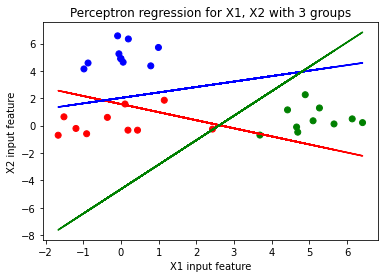

In [23]:

x1 = X[:, 0]
x2 = X[:, 1]
def colorfunc(value):
    if value == 2: return "green"
    if value == 1: return "blue"
    if value == 0: return "red"


color = [colorfunc(value)  for value in y]


plt.scatter(x1, x2, marker='o', color=color)
plt.xlabel('X1 input feature')
plt.ylabel('X2 input feature')
plt.title('Perceptron regression for X1, X2 with 3 groups')

colors=["red","blue","green"]
for i in range(reg.coef_.shape[0]):
    slope = -(reg.coef_[i][0]/reg.coef_[i][1])
    intercept = -reg.intercept_[i]/reg.coef_[i][1]
    Y = (slope*x1)
    Y+= + intercept
    plt.plot(x1, Y, color = colors[i])

plt.show()

Como podemos comprobar se han dibujado las tres rectas correctamente, encargándose cada una de dividr un grupo del resto. Cada recta tiene el color del grupo que divide. Sin embargo, a diferemcia del caso anterior, hay diferentes muestras que no parecen estar bien clasificadas, para averiguarlo utilizo de nuevo la función "decision_function"

In [24]:
#
classifier = SGDClassifier.decision_function(reg, testx)
temp = np.zeros(shape=testy.shape)
temp[np.where(classifier > 0)[0]] = (np.where(classifier > 0)[1] + 1)

sum(np.equal(temp, (testy + 1))) / testx.shape[0]

0.8888888888888888

Tras ciertos cálculos con numpy, compruebo que divide de forma correcta un 88.8%, a diferencia del 100% anterior. Esto se puede deber a un sobreajuste con los datos de entrenamiento, en cualquier caso, el ajuste no es perfecto pero es bueno.

### Tarea 2, implementación

##### Para terminar esta práctica implementamos el Perceptron en un módulo llamado lineal, con las funciones fit y predict para 2 clases.

En el módulo implementado el objeto "Perceptron" tiene los siguientes parámetros:

-max_iter es el número máximo de iteraciones del método.
-mezclar indica si se deben mezclar las muestras después de cada época
-eta0 se corresponde con la fracción de la muestra mal clasificada por la que se actualiza el vector de pesos.
-semilla valor al que inicializar el generador de números aleatorios.

Una vez creado el objeto, se puede entrenar utilizado el método fit, y enviándo de parámetros 2 numpys arrays, el primero representando el conjunto de entrenamiento con tantas columnas como características y filas como muestras. El segundo array sera unidimensional indicando la clase (0 o 1) de cada muestra. El otro método es el predict, que se le envía un conjunto de entrenamiento del mismo formato que antes, y devuelve un numpy array unidimensional con la clase que el modelo predice para cada muestra.

Comenzaremos mostrando un ejemplo con las mismas características que la primera prueba, pero usando el módulo implementado:

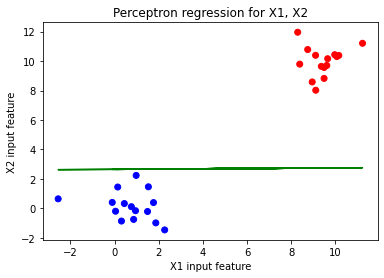

In [27]:
import lineal
centers = np.array([[0,0],[10,10]])
X, y = make_blobs(n_samples=30, n_features=2,random_state=0, centers=centers)
trainx, testx, trainy, testy = train_test_split(X, y, train_size=0.7,random_state=0)
percep = lineal.Perceptron(max_iter=50,mezclar=False,eta0=0.01,semilla=2)
percep.fit(trainx,trainy)

x1 = X[:, 0]
x2 = X[:, 1]
color = ['red' if value == 1 else 'blue' for value in y]
plt.scatter(x1, x2, marker='o', color=color)
plt.xlabel('X1 input feature')
plt.ylabel('X2 input feature')
plt.title('Perceptron regression for X1, X2')
slope = -(percep.pesos_[1]/percep.pesos_[2])
intercept = -percep.pesos_[0]/percep.pesos_[2]
Y = (slope*x1) + intercept
plt.plot(x1, Y, color = "green")
plt.show()

Como podemos observar, la recta dibujada por los pesos del modelo divide perfectamente ambos conjuntos de muestras.

In [26]:
sum(np.equal(np.greater(SGDClassifier.decision_function(p, testx), np.zeros(shape=testx.shape[0])), testy )) / testx.shape[0]

1.0

Clasifica correctamente un 100% de las muestras. Por lo tanto, es un buen ajuste.

Notas de la implementación del método fit y predict:

predict: Iteramos todas las muestras que han llegado. A cada muestra se le aplica la función del Perceptrón y si el resultado es positivo, esa muestra pertenece a la clase 1, y si es negativo, pertenece a la clase 0.

fit: Por otro lado, la función fit itera cada muestra llegada con su etiqueta. Primero calcula el error de los pesos actuales enviando una muestra a predict y comparandolo con la etiqueta, el error lo multiplico por eta0 y con ese valor ajusto los pesos. Luego mezclo las muestras si se decidió de esta forma, además repito el proceso tantas veces como épocas.